In [1]:
#importing imp libraries

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as s
import matplotlib.pyplot as plt
#sns.set(style = 'whitegrid')
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
data.shape

(614, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


seems data having lots of outliers. we will deal with it later

In [8]:
#load id columns have no use. just the unique id so dropping it .
data.drop(['Loan_ID'],axis=1,inplace=True)

In [9]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA

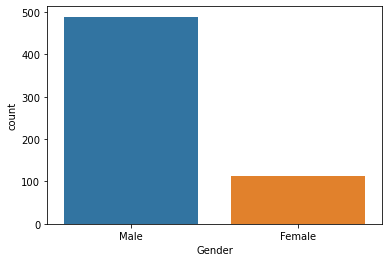

In [10]:
sns.countplot(x='Gender',data=data)
plt.show()


no. of males applicants are more as compared to females

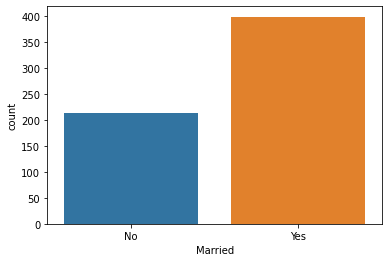

In [11]:
sns.countplot(x='Married', data=data)
plt.show()


married people applying more for loan

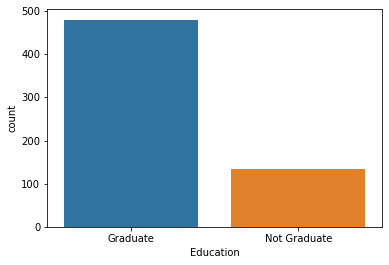

In [12]:
sns.countplot(x='Education', data=data)
plt.show()


graduates are more in no.

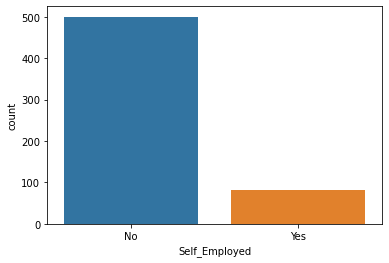

In [13]:
sns.countplot(x='Self_Employed', data=data)
plt.show()


people doing jobs are more and self employed are less in no. for applying loans

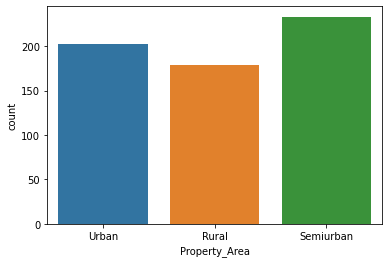

In [14]:
sns.countplot(x='Property_Area', data=data)
plt.show()


property in semiurban area is more in no.

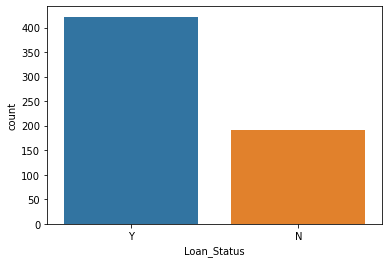

In [15]:
sns.countplot(x='Loan_Status', data=data)
plt.show()


approval of loan status is more. and this is dependent variable and seems to be imbalaced. we will further process it .

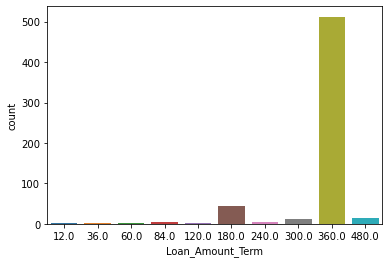

In [16]:
sns.countplot(x='Loan_Amount_Term', data=data)
plt.show()


As can be seen from the results, the 360 days loan duration is the most popular compared to others.


# checking distribution of numerical data.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

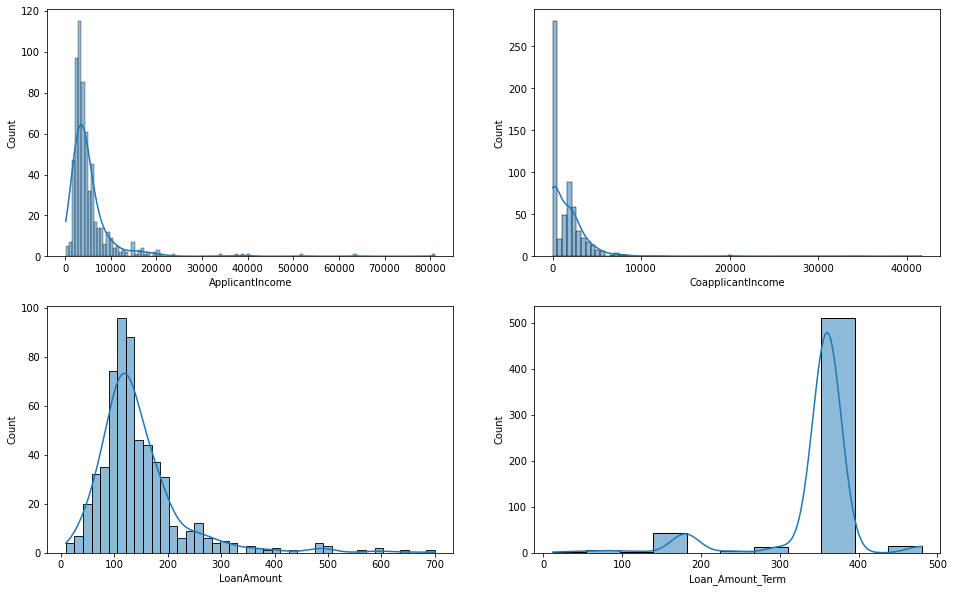

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(16,10))

sns.histplot(data=data, x='ApplicantIncome', kde=True, ax=axs[0,0])
sns.histplot(data=data, x='CoapplicantIncome', kde=True, ax=axs[0,1])
sns.histplot(data=data, x='LoanAmount', kde=True, ax=axs[1,0])
sns.histplot(data=data, x='Loan_Amount_Term', kde=True, ax=axs[1,1])

The distribution of Applicant income, Co Applicant Income, and Loan Amount are right skewed and it has outliers.
The distribution of Loan_Amoubt_Term are left Skewed and has outliers.

# visualizing Loan_Status with some Features:



<AxesSubplot:xlabel='Education', ylabel='count'>

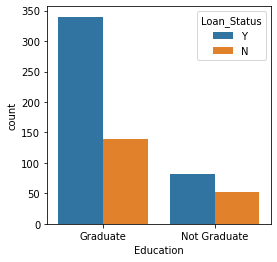

In [18]:
plt.figure(figsize=(4,4))
sns.countplot(x='Education',hue='Loan_Status',data=data)

the most of the gradute who applied for loan is approved. non graduated are less and there loan application is approved. so education is not one of the imp feature for approval of loan.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

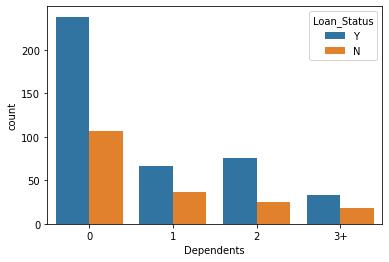

In [19]:
sns.countplot(x='Dependents',hue='Loan_Status',data=data)


the people with no dependents having high chances of loan approval.

<AxesSubplot:xlabel='Married', ylabel='count'>

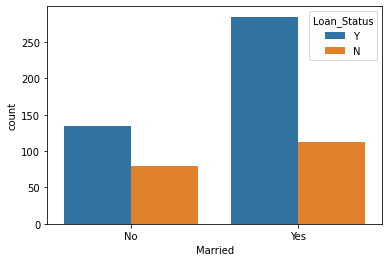

In [20]:
sns.countplot(x='Married',hue='Loan_Status',data=data)


married people are more to apply for loan and chaces of getting it is also high.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

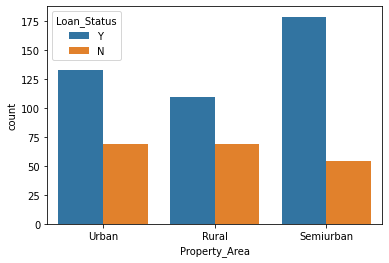

In [21]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=data)


people those who are having properties in semi urban area seems to get loan approval. chances are high in comparision with other two. 

<AxesSubplot:xlabel='Gender', ylabel='count'>

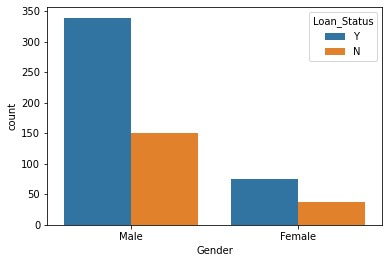

In [22]:
sns.countplot( x='Gender',hue='Loan_Status',data=data)


males applied for loan are more in no. and getting approval is also higher than female.

In [23]:
#Adding the applicant and co-applicant income to get the total income per application
data['total_income']=data['ApplicantIncome'] + data['CoapplicantIncome']


In [24]:
#Dropping the columns as we created a new column which captures the same information
data.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)


<AxesSubplot:xlabel='Loan_Status', ylabel='total_income'>

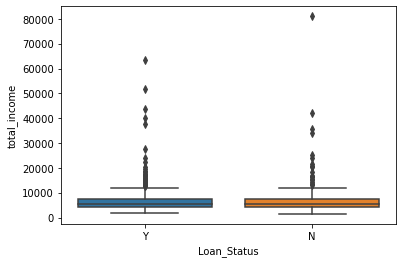

In [25]:
#Let's check the relationship of total income with loan status:

sns.boxplot(x=data.Loan_Status, y=data.total_income)




Except for some outliers, there is no major difference between the income of those customers who are eligible versus those who are not.


This implies that income alone might not be a good indicator of a customer's loan eligibility.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

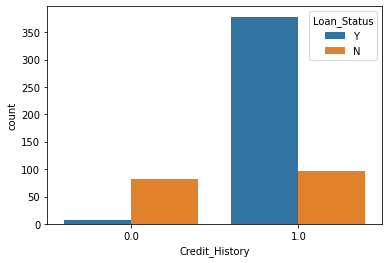

In [26]:
#Let's check how credit history is related to loan status:

sns.countplot(x=data.Credit_History, hue=data.Loan_Status)




The plot shows that credit history is an important factor while checking loan eligibility. There are very few customers whose loan was approved even when their credit history did not meet required guidelines.

# Imputing the null values:

In [27]:
#Imputing missing values with mode for the categorical variables 
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']:
    data[col].fillna(value=data[col].mode()[0], inplace=True)


In [28]:
#Replacing 0's with null values in loan amount 
data.LoanAmount.replace(0, np.nan, inplace=True)

#Imputing null values in loan amount with the median
data.LoanAmount.fillna(value=data.LoanAmount.median(), inplace=True)


In [29]:
data.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
total_income        0
dtype: int64

In [30]:
data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True) # label encoding


In [31]:
data.replace({"Gender":{"Female":0,"Male":1}, 'Self_Employed':{'No':0,'Yes':1},'Education':{'Graduate':1,'Not Graduate':0}
             ,'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Married':{'No':0,'Yes':1},"Dependents":{"3+":4}},inplace=True)


In [32]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,1,0,0,1,0,128.0,360.0,1.0,2,1,5849.0
1,1,1,1,1,0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,1,1,66.0,360.0,1.0,2,1,3000.0
3,1,1,0,0,0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,1,0,141.0,360.0,1.0,2,1,6000.0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    int64  
 1   Married           614 non-null    int64  
 2   Dependents        614 non-null    object 
 3   Education         614 non-null    int64  
 4   Self_Employed     614 non-null    int64  
 5   LoanAmount        614 non-null    float64
 6   Loan_Amount_Term  614 non-null    float64
 7   Credit_History    614 non-null    float64
 8   Property_Area     614 non-null    int64  
 9   Loan_Status       614 non-null    int64  
 10  total_income      614 non-null    float64
dtypes: float64(4), int64(6), object(1)
memory usage: 52.9+ KB


Every column is converted to int or float accept dependents. let's convert it too. 

In [34]:
data['Dependents'] = data['Dependents'].astype(str).astype(int)


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    int64  
 1   Married           614 non-null    int64  
 2   Dependents        614 non-null    int32  
 3   Education         614 non-null    int64  
 4   Self_Employed     614 non-null    int64  
 5   LoanAmount        614 non-null    float64
 6   Loan_Amount_Term  614 non-null    float64
 7   Credit_History    614 non-null    float64
 8   Property_Area     614 non-null    int64  
 9   Loan_Status       614 non-null    int64  
 10  total_income      614 non-null    float64
dtypes: float64(4), int32(1), int64(6)
memory usage: 50.5 KB


now looks fine . good to go.

# Removing outliers:

Now let's remove the outiers:

In [36]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1


In [37]:
data = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis=1)]


Treating the Skewed Distribution:


As we have seen that some of the numerical columns are skewed, we will apply Square Root Transformation



In [38]:
data['total_income'] = np.sqrt(data['total_income'])
data['LoanAmount'] = np.sqrt(data['LoanAmount'])
data['Loan_Amount_Term'] = np.sqrt(data['Loan_Amount_Term'])


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

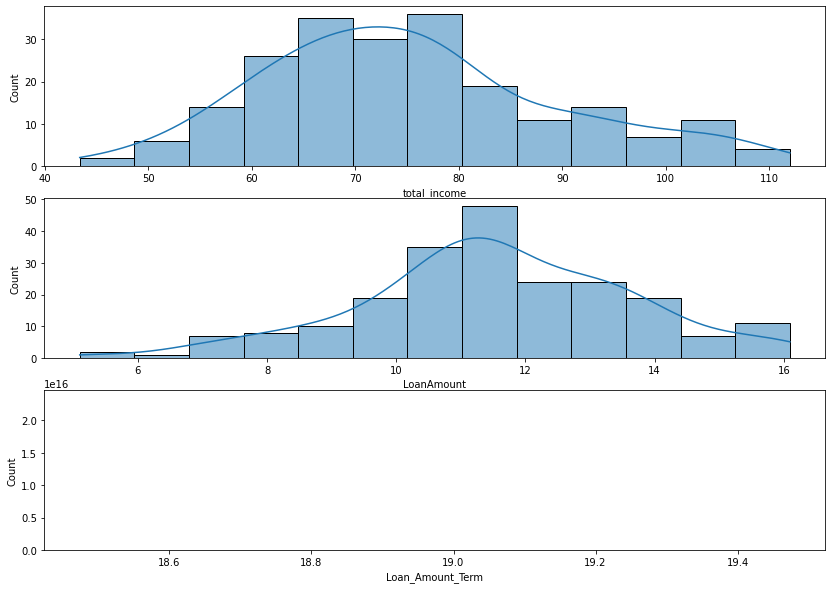

In [39]:
fig, axs = plt.subplots(3, 1, figsize=(14,10))

sns.histplot(data=data, x='total_income', kde=True,ax=axs[0])
sns.histplot(data=data, x='LoanAmount', kde=True,ax=axs[1])
sns.histplot(data=data, x='Loan_Amount_Term', kde=True,ax=axs[2])


As we can see, by applying the Square root transformation the distributions are much more better than the original distributions.



# SMOTE Technique


As the Data in the dependent variable is Imbalanced. So we will use the SMOTE technique to oversample the data to avoid overfitting.



In [40]:
X = data.drop(["Loan_Status"], axis=1)
y = data["Loan_Status"]


In [41]:
#installing imblearn module:

!pip install imblearn


In [42]:
from imblearn.over_sampling import SMOTE

X, y = SMOTE().fit_resample(X, y)


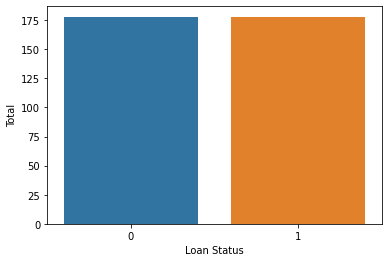

In [43]:
sns.countplot(data=data, x=y)
plt.xlabel('Loan Status')
plt.ylabel('Total')
plt.show()


now the label is perfectly balanced.

# Normalizing the Data


In [44]:
from sklearn.preprocessing import StandardScaler

Std_Sc = StandardScaler()
X = Std_Sc.fit_transform(X)


In [45]:
X

array([[ 0.        , -1.19237943, -0.54953196, ...,  0.        ,
         1.36028416,  0.12145659],
       [ 0.        ,  0.83865922,  0.88894875, ...,  0.        ,
        -1.20874057,  0.22860184],
       [ 0.        , -1.19237943, -0.54953196, ...,  0.        ,
         1.36028416,  0.18856583],
       ...,
       [ 0.        , -1.19237943, -0.54953196, ...,  0.        ,
        -1.20874057, -1.95058121],
       [ 0.        , -1.19237943, -0.54953196, ...,  0.        ,
        -1.20874057,  1.76394173],
       [ 0.        , -1.19237943, -0.54953196, ...,  0.        ,
        -1.20874057, -1.2305964 ]])

# Model Building

In [46]:
#importing imp libraries for models training:


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [47]:
#spliting the data for train and test:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=22)

In [48]:
#definig the function for train and test the model:

def metric_score(clf,X_train,X_test,y_train,y_test,train=True):
    if train :
        y_pred=clf.predict(X_train)
        print("\n**********************************Train Result***************************************")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:2f}%")
    elif train == False :
        pred = clf.predict(X_test)
        print("\n**********************************Test Result****************************************")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:2f}%")
        print('\n \n Test Classification Report \n',classification_report(y_test,pred,digits=2))

# Knn Model

In [49]:
knn = KNeighborsClassifier()

In [50]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [51]:
metric_score(knn,X_train,X_test,y_train,y_test,train=True)
metric_score(knn,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:82.397004%

**********************************Test Result****************************************
Accuracy Score:77.528090%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.78      0.80        51
           1       0.72      0.76      0.74        38

    accuracy                           0.78        89
   macro avg       0.77      0.77      0.77        89
weighted avg       0.78      0.78      0.78        89



# RandomForest Classifier Model

In [52]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [53]:
metric_score(rfc,X_train,X_test,y_train,y_test,train=True)
metric_score(rfc,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:100.000000%

**********************************Test Result****************************************
Accuracy Score:78.651685%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.78      0.81        51
           1       0.73      0.79      0.76        38

    accuracy                           0.79        89
   macro avg       0.78      0.79      0.78        89
weighted avg       0.79      0.79      0.79        89



# Decision Tree Model

In [54]:
DT = DecisionTreeClassifier()

In [55]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
metric_score(DT,X_train,X_test,y_train,y_test,train=True)
metric_score(DT,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:100.000000%

**********************************Test Result****************************************
Accuracy Score:69.662921%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.77      0.67      0.72        51
           1       0.62      0.74      0.67        38

    accuracy                           0.70        89
   macro avg       0.70      0.70      0.70        89
weighted avg       0.71      0.70      0.70        89



# Checking for CrossValidation Score: 

In [57]:
from sklearn.model_selection import KFold,cross_val_score


In [58]:
cross_val_score(knn,X ,y ,cv=7)

array([0.80392157, 0.64705882, 0.76470588, 0.70588235, 0.82352941,
       0.80392157, 0.7       ])

In [59]:
cross_val_score(KNeighborsClassifier(),X,y,cv=7).mean()

0.749859943977591

In [60]:
cross_val_score(rfc,X ,y ,cv=7).mean()

0.800280112044818

In [61]:
cross_val_score(DT,X ,y ,cv=5).mean()

0.7781298904538341

# Hyperparameter Tunning

# Knn Tunning

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid={'algorithm':['kd_tree','brute'],'leaf_size':[3,5,6,7,8],'n_neighbors':[3,5,7,9,11,13]}

In [64]:
gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid)


In [65]:
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [66]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 3}

In [67]:
knn = KNeighborsClassifier(algorithm='kd_tree',leaf_size=3,n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [68]:
metric_score(knn,X_train,X_test,y_train,y_test,train=True)
metric_score(knn,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:87.265918%

**********************************Test Result****************************************
Accuracy Score:69.662921%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.74      0.73      0.73        51
           1       0.64      0.66      0.65        38

    accuracy                           0.70        89
   macro avg       0.69      0.69      0.69        89
weighted avg       0.70      0.70      0.70        89



# RFC Tunning

In [69]:
from sklearn.model_selection import RandomizedSearchCV


In [70]:
param_grid={'n_estimators':[100, 300, 500],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
            'max_depth':[None,1,2,3,4,5,6,7,8]}

In [71]:
randomsearch=RandomizedSearchCV(RandomForestClassifier(),param_grid,cv=10)


In [72]:
randomsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 300, 500]})

In [73]:
randomsearch.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 8}

In [74]:
rfc=RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=3,n_estimators=500)

In [75]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=500)

In [76]:
metric_score(rfc,X_train,X_test,y_train,y_test,train=True)
metric_score(rfc,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:89.887640%

**********************************Test Result****************************************
Accuracy Score:75.280899%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.75      0.78        51
           1       0.69      0.76      0.72        38

    accuracy                           0.75        89
   macro avg       0.75      0.75      0.75        89
weighted avg       0.76      0.75      0.75        89



# Decision Tree Tunning

In [77]:
param_grid={'criterion':['gini','entropy'],
           'max_depth':range(10,15),
           'min_samples_leaf':range(2,6),
           'min_samples_split':range(3,8),
           'max_leaf_nodes':range(5,10)}

In [78]:
gridsearch=GridSearchCV(estimator=DT,param_grid=param_grid,cv=5,n_jobs=-1)

In [79]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [80]:
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 5}

In [81]:
DT=DecisionTreeClassifier(criterion='gini',min_samples_split=4,max_depth=10,max_leaf_nodes=7,min_samples_leaf=3)
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=7, min_samples_leaf=3,
                       min_samples_split=4)

In [82]:
metric_score(DT,X_train,X_test,y_train,y_test,train=True)
metric_score(DT,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:76.404494%

**********************************Test Result****************************************
Accuracy Score:74.157303%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.73      0.76        51
           1       0.67      0.76      0.72        38

    accuracy                           0.74        89
   macro avg       0.74      0.74      0.74        89
weighted avg       0.75      0.74      0.74        89



After hyperparameter tunning Random Forest Classifier model seem to give good accuracy score of 75.28% and recall value for 0 is also high ie. 75%.So finalizing RFC model

# Finalizing Model

In [83]:
final_model = RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=3,n_estimators=500)

In [84]:
final_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=500)

In [85]:
import joblib

In [86]:
joblib.dump(final_model,'Loan Project')

['Loan Project']